brew install graphviz  # had to upgrade graphviz on el capitan

pip install graphviz
pip install pygraphviz #I failed to get this installed

 so I tried this:
 
pip install pydot

hmm...looks like just pip install graphviz.

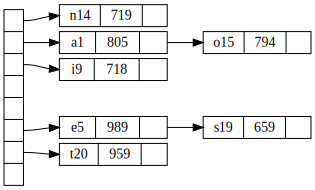

In [9]:
import graphviz
from IPython.display import display

dot_graph = """
digraph arraygraph {
rankdir="LR"
array [shape="record", label="0 | 1 | 2 | 3 "]

array:f0:e->jerry
array:f1:e->george
array:f2:e->kramer
array:f3:e->elaine
}
"""
dot_graph = """
digraph G {
    nodesep=.05;
    rankdir=LR;
    node [shape=record,width=.1,height=.1];

    node0 [label = " <f0>|<f1>|<f2> | | |<f5>|<f6>| ",height=2.0];
    node [width = 1.5];
    node1 [label = "{<n> n14 | 719 | }"];
    node2 [label = "{<n> a1 | 805 |<p>}"];
    node3 [label = "{<n> i9 | 718 | }"];
    node4 [label = "{<n> e5 | 989 |<p> }"];
    node5 [label = "{<n> t20 | 9The59 | }"] ;
    node6 [label = "{<n> o15 | 794 | }"] ;
    node7 [label = "{<n> s19 | 659 | }"] ;

    node0:f0 -> node1:n;
    node0:f1 -> node2:n;
    node0:f2 -> node3:n;
    node0:f5 -> node4:n;
    node0:f6 -> node5:n;
    node2:p -> node6:n;
    node4:p -> node7:n;
}
"""
display(graphviz.Source(dot_graph))

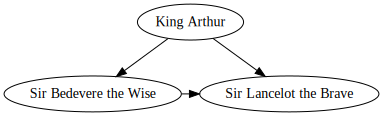

In [3]:
from graphviz import Digraph

dot = Digraph(comment='The Round Table')

dot.node('A', 'King Arthur')
dot.node('B', 'Sir Bedevere the Wise')
dot.node('L', 'Sir Lancelot the Brave')

dot.edges(['AB', 'AL'])
dot.edge('B', 'L', constraint='false')

dot

In [24]:
def lolviz(table, showassoc=True):
    """
    Given a list of lists such as:

      [ [('a','3')], [], [('b',230), ('c',21)] ]

    return the dot/graphviz to display as a two-dimensional
    structure.

    If showassoc, display 2-tuples (x,y) as x->y.
    """
    s = """
    digraph G {
        nodesep=.05;
        rankdir=LR;
        node [shape=record,width=.1,height=.1];
    """
    # Make outer list as vertical
    labels = []
    for i in range(len(table)):
        bucket = table[i]
        if len(bucket)==0: labels.append(str(i))
        else: labels.append("<f%d> %d" % (i,i))

    s += '    mainlist [color="#444443", fontsize="9", fontcolor="#444443", fontname="Helvetica", style=filled, fillcolor="#D9E6F5", label = "'+'|'.join(labels)+'"];\n'

    # define inner lists
    for i in range(len(table)):
        bucket = table[i]
        if not bucket or len(bucket)==0: continue
        elements = []
        for j, el in enumerate(bucket):
            if showassoc and type(el)==tuple and len(el)==2: els = "%s&rarr;%s" % el
            else: els = str(el)
            els = els.replace('{', '&#123;')
            els = els.replace('}', '&#125;')
            elements.append('<table BORDER="0" CELLBORDER="1" CELLSPACING="0"><tr><td cellspacing="0" bgcolor="#FBFEB0" border="1" sides="b" valign="top"><font color="#444443" point-size="9">%d</font></td></tr><tr><td bgcolor="#FBFEB0" border="0" align="center"><font point-size="11">%s</font></td></tr></table>' % (j, els))
        s += 'node%d [color="#444443", fontname="Helvetica", margin="0.01", space="0.0", shape=record label=<{%s}>];\n' % (i, '|'.join(elements))

    # Do edges
    for i in range(len(table)):
        bucket = table[i]
        if not bucket or len(bucket)==0: continue
        s += 'mainlist:f%d -> node%d [arrowsize=.5]\n' % (i,i)
    s += "}\n"
    return graphviz.Source(s)

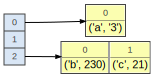

In [40]:
import graphviz
x = [ [('a','3')], [], [('b',230), ('c',21)] ]
#x = [('the',{2:4}), ('cat',1), ('sat',1), ('hat',1)]
#x = [ [('ronald',{9,3}), ('reagan',{17})], [], [], [], [] ]
lolviz(x,showassoc=False)